# (공부) 데이터 시각화 기말 노트
> 기말대비
- toc:true
- branch: master
- badges: true
- comments: true
- author: 김하영
- categories: [Visual]

In [41]:
#hide
import requests
from IPython.display import HTML
import plotly.express as px
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import HTML
import json 
import folium 
import seaborn as sns 
from plotnine import * 
import cv2 

In [2]:
df=pd.read_html('https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000', encoding='utf-8')[1]   #한글 깨짐 현상 해결을 위해  encoding 추가, 2번째 데이터인데 첫번째로 읽힘..
df

구분   1차접종             2차접종           3차(부스터)접종         
    구분  당일 실적     당일 누계  당일 실적     당일 누계     당일 실적    당일 누계
0   합계  51353  42733049  65123  41410206    283796  4242449
1   서울   9131   7955953  11854   7736180     62802   794615
2   부산   3184   2730951   3599   2643595     17082   251543
3   대구   2476   1900800   2643   1838724     10293   156707
4   인천   3224   2438290   5088   2361539     16843   220467
5   광주   1347   1193339   2568   1150750      5854   124158
6   대전   1445   1176866   1468   1137943      6580   109483
7   울산   1161    910902   1052    883593      3942    68464
8   세종    405    273276    380    263159      1397    25606
9   경기  15055  11188968  17087  10853050     70634  1046003
10  강원   1210   1282218   1975   1242880      9922   140076
11  충북   1316   1355078   1825   1313487      8574   145695
12  충남   1927   1794108   2330   1733928     11193   198464
13  전북   1513   1517933   3297   1469302     11808   187623
14  전남   1320   1578459   2194   1527698     11740   229015
15  경북   2381   2165013   2597   2094437     14657   226820
16  경남   3397   2719492   4340   2627700     17142   266864
17  제주    861    551403    826    532241      3333    50846

----

## melt

- 빈 칸으로 melt를 쓰면 그냥 냅다 쌓음.
- 첫 번째 열부터 냅다 쌓는다. 여기서는 변수명이 2개(구분,구분)이런 식이라 3개 열로 쌓인 모양.
- 변수명, 값 으로 쌓인다고 이해하자.

In [5]:
df.melt()

,variable_0,variable_1,value
0,구분,구분,합계
1,구분,구분,서울
2,구분,구분,부산
3,구분,구분,대구
4,구분,구분,인천
...,...,...,...
121,3차(부스터)접종,당일 누계,187623
122,3차(부스터)접종,당일 누계,229015
123,3차(부스터)접종,당일 누계,226820
124,3차(부스터)접종,당일 누계,266864


In [7]:
df.columns

MultiIndex([(       '구분',    '구분'),
            (     '1차접종', '당일 실적'),
            (     '1차접종', '당일 누계'),
            (     '2차접종', '당일 실적'),
            (     '2차접종', '당일 누계'),
            ('3차(부스터)접종', '당일 실적'),
            ('3차(부스터)접종', '당일 누계')],
           )

## stack

- stack을 하면 열이름을 기준으로 된다.
- 열이름이 2개로 나눠진 경우 무조건!!

In [35]:
df.stack()

1차접종        2차접종  3차(부스터)접종   구분
0  구분            NaN         NaN        NaN   합계
   당일 누계  42733049.0  41410206.0  4242449.0  NaN
   당일 실적     51353.0     65123.0   283796.0  NaN
1  구분            NaN         NaN        NaN   서울
   당일 누계   7955953.0   7736180.0   794615.0  NaN
   당일 실적      9131.0     11854.0    62802.0  NaN
2  구분            NaN         NaN        NaN   부산
   당일 누계   2730951.0   2643595.0   251543.0  NaN
   당일 실적      3184.0      3599.0    17082.0  NaN
3  구분            NaN         NaN        NaN   대구
   당일 누계   1900800.0   1838724.0   156707.0  NaN
   당일 실적      2476.0      2643.0    10293.0  NaN
4  구분            NaN         NaN        NaN   인천
   당일 누계   2438290.0   2361539.0   220467.0  NaN
   당일 실적      3224.0      5088.0    16843.0  NaN
5  구분            NaN         NaN        NaN   광주
   당일 누계   1193339.0   1150750.0   124158.0  NaN
   당일 실적      1347.0      2568.0     5854.0  NaN
6  구분            NaN         NaN        NaN   대전
   당일 누계   1176866.0   1137943.0   109483.0  NaN
   당일 실적      1445.0      1468.0     6580.0  NaN
7  구분            NaN         NaN        NaN   울산
   당일 누계    910902.0    883593.0    68464.0  NaN
   당일 실적      1161.0      1052.0     3942.0  NaN
8  구분            NaN         NaN        NaN   세종
   당일 누계    273276.0    263159.0    25606.0  NaN
   당일 실적       405.0       380.0     1397.0  NaN
9  구분            NaN         NaN        NaN   경기
   당일 누계  11188968.0  10853050.0  1046003.0  NaN
   당일 실적     15055.0     17087.0    70634.0  NaN
10 구분            NaN         NaN        NaN   강원
   당일 누계   1282218.0   1242880.0   140076.0  NaN
   당일 실적      1210.0      1975.0     9922.0  NaN
11 구분            NaN         NaN        NaN   충북
   당일 누계   1355078.0   1313487.0   145695.0  NaN
   당일 실적      1316.0      1825.0     8574.0  NaN
12 구분            NaN         NaN        NaN   충남
   당일 누계   1794108.0   1733928.0   198464.0  NaN
   당일 실적      1927.0      2330.0    11193.0  NaN
13 구분            NaN         NaN        NaN   전북
   당일 누계   1517933.0   1469302.0   187623.0  NaN
   당일 실적      1513.0      3297.0    11808.0  NaN
14 구분            NaN         NaN        NaN   전남
   당일 누계   1578459.0   1527698.0   229015.0  NaN
   당일 실적      1320.0      2194.0    11740.0  NaN
15 구분            NaN         NaN        NaN   경북
   당일 누계   2165013.0   2094437.0   226820.0  NaN
   당일 실적      2381.0      2597.0    14657.0  NaN
16 구분            NaN         NaN        NaN   경남
   당일 누계   2719492.0   2627700.0   266864.0  NaN
   당일 실적      3397.0      4340.0    17142.0  NaN
17 구분            NaN         NaN        NaN   제주
   당일 누계    551403.0    532241.0    50846.0  NaN
   당일 실적       861.0       826.0     3333.0  NaN

- 계속 해보면... 우리가 알고 싶은 변수도 걍 섞여버린다..

In [36]:
df.stack().stack().reset_index()

,level_0,level_1,level_2,0
0,0,구분,구분,합계
1,0,당일 누계,1차접종,42733049.0
2,0,당일 누계,2차접종,41410206.0
3,0,당일 누계,3차(부스터)접종,4242449.0
4,0,당일 실적,1차접종,51353.0
...,...,...,...,...
121,17,당일 누계,2차접종,532241.0
122,17,당일 누계,3차(부스터)접종,50846.0
123,17,당일 실적,1차접종,861.0
124,17,당일 실적,2차접종,826.0


In [28]:
df.set_index(('구분','구분')).iloc[1:,:]

1차접종             2차접종           3차(부스터)접종         
          당일 실적     당일 누계  당일 실적     당일 누계     당일 실적    당일 누계
(구분, 구분)                                                     
서울         9131   7955953  11854   7736180     62802   794615
부산         3184   2730951   3599   2643595     17082   251543
대구         2476   1900800   2643   1838724     10293   156707
인천         3224   2438290   5088   2361539     16843   220467
광주         1347   1193339   2568   1150750      5854   124158
대전         1445   1176866   1468   1137943      6580   109483
울산         1161    910902   1052    883593      3942    68464
세종          405    273276    380    263159      1397    25606
경기        15055  11188968  17087  10853050     70634  1046003
강원         1210   1282218   1975   1242880      9922   140076
충북         1316   1355078   1825   1313487      8574   145695
충남         1927   1794108   2330   1733928     11193   198464
전북         1513   1517933   3297   1469302     11808   187623
전남         1320   1578459   2194   1527698     11740   229015
경북         2381   2165013   2597   2094437     14657   226820
경남         3397   2719492   4340   2627700     17142   266864
제주          861    551403    826    532241      3333    50846

- 위와 같이 변수명이 2줄이고, 인덱스를 기준으로 묶음이 필요할 때
- 냅다 stack해주면 인덱스 기준으로 잘 쌓여짐 -> 인덱스가 숫자일 때는 별 소용없겠다.
- 그리고 stack 한 다음에는 reset index 필수겠다.

In [29]:
df.set_index(('구분','구분')).iloc[1:,:].stack()

1차접종      2차접종  3차(부스터)접종
(구분, 구분)                                     
서울       당일 누계   7955953   7736180     794615
         당일 실적      9131     11854      62802
부산       당일 누계   2730951   2643595     251543
         당일 실적      3184      3599      17082
대구       당일 누계   1900800   1838724     156707
         당일 실적      2476      2643      10293
인천       당일 누계   2438290   2361539     220467
         당일 실적      3224      5088      16843
광주       당일 누계   1193339   1150750     124158
         당일 실적      1347      2568       5854
대전       당일 누계   1176866   1137943     109483
         당일 실적      1445      1468       6580
울산       당일 누계    910902    883593      68464
         당일 실적      1161      1052       3942
세종       당일 누계    273276    263159      25606
         당일 실적       405       380       1397
경기       당일 누계  11188968  10853050    1046003
         당일 실적     15055     17087      70634
강원       당일 누계   1282218   1242880     140076
         당일 실적      1210      1975       9922
충북       당일 누계   1355078   1313487     145695
         당일 실적      1316      1825       8574
충남       당일 누계   1794108   1733928     198464
         당일 실적      1927      2330      11193
전북       당일 누계   1517933   1469302     187623
         당일 실적      1513      3297      11808
전남       당일 누계   1578459   1527698     229015
         당일 실적      1320      2194      11740
경북       당일 누계   2165013   2094437     226820
         당일 실적      2381      2597      14657
경남       당일 누계   2719492   2627700     266864
         당일 실적      3397      4340      17142
제주       당일 누계    551403    532241      50846
         당일 실적       861       826       3333

## ggplot 그려보기

In [76]:
_df=df.set_index(('구분','구분')).iloc[1:,:].stack().reset_index().query('level_1=="당일 누계"')
_df.columns=pd.Index(['prov', 'level','first','second','third'])

In [77]:
_df=_df.set_index('prov').iloc[:,1:].reset_index().sort_values(by='first',ascending=True)
_df

,prov,first,second,third
7,세종,273276,263159,25606
16,제주,551403,532241,50846
6,울산,910902,883593,68464
5,대전,1176866,1137943,109483
4,광주,1193339,1150750,124158
9,강원,1282218,1242880,140076
10,충북,1355078,1313487,145695
12,전북,1517933,1469302,187623
13,전남,1578459,1527698,229015
11,충남,1794108,1733928,198464


```
ggplot(df)\
+geom_point(aes(x='Dribbling',y='SlidingTackle',color='Age'),alpha=0.5,size=0.5)\
+facet_wrap('Best Position')
```

- ggplot을 쓰려면 아주 깔끔하게.. 데이터를 정리해주기
- 웬만하면 영어이름으로 변경해주기

/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48513 missing from current font.
/home/khy/anaconda3/envs/py38r40/lib/python3.8/site-packages/mat

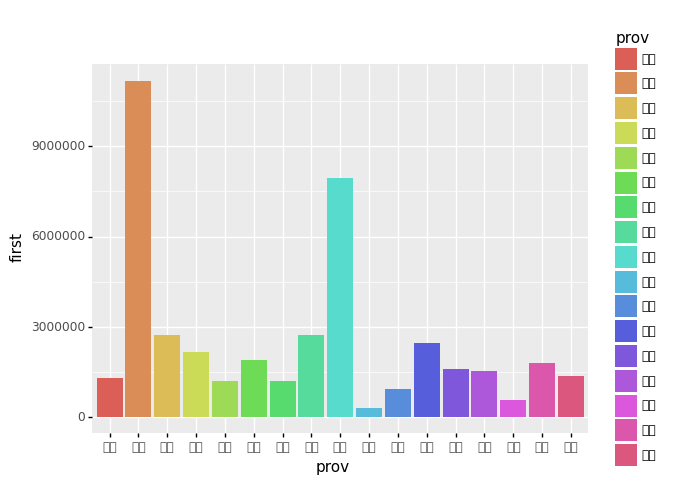

<ggplot: (8735862003303)>

In [83]:
ggplot(_df)+geom_bar(aes(x='prov', y='first', fill='prov'),stat='identity')#+facet_wrap('prov')

## assign, split, pipe 이해

- 연도만 뽑아보자

In [107]:
df.Date[0]

'01/02/1965'

In [108]:
_.split('/')[-1]   #_는 잠시 저장된 데이터, 위에서 부터 다시 해줘야 함

'1965'

- df.assign을 하면 옆에 붙음

In [112]:
df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date)))

,Date,Latitude,Longitude,Magnitude,Year
0,01/02/1965,19.2460,145.6160,6.0,1965
1,01/04/1965,1.8630,127.3520,5.8,1965
2,01/05/1965,-20.5790,-173.9720,6.2,1965
3,01/08/1965,-59.0760,-23.5570,5.8,1965
4,01/09/1965,11.9380,126.4270,5.8,1965
...,...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,5.6,2016
23408,12/28/2016,38.3777,-118.8957,5.5,2016
23409,12/28/2016,36.9179,140.4262,5.9,2016
23410,12/29/2016,-9.0283,118.6639,6.3,2016


- 연도별로 Group by 해주고, pipe(%>%) list를 뽑아주고, 뒤에 [0] 붙이면 첫번째 1965년 데이터 모음이 나오고, [1]을 붙여서 데이터프레임 형태로..

In [115]:
df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).groupby('Year').pipe(list)[0][1]

,Date,Latitude,Longitude,Magnitude,Year
0,01/02/1965,19.246,145.616,6.0,1965
1,01/04/1965,1.863,127.352,5.8,1965
2,01/05/1965,-20.579,-173.972,6.2,1965
3,01/08/1965,-59.076,-23.557,5.8,1965
4,01/09/1965,11.938,126.427,5.8,1965
...,...,...,...,...,...
334,12/25/1965,-18.096,-178.979,6.2,1965
335,12/26/1965,-5.201,151.583,5.9,1965
336,12/28/1965,27.863,141.992,5.8,1965
337,12/30/1965,54.210,-164.476,5.6,1965


- `iloc`으로 2,3,4열만 추출하고, 넘파이로 바꿔줬다가 리스트로 바꿔주는데,  
- 위에서 1965년 dataframe 만든 것처럼 다른 연도도 해야되니까 for문을 넣어준다  
- for문의 결과를 [ ]안에 묶어서 lst로 저장

- .\은 +같은 역할

In [124]:
lst=[df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2017-1965)]